# Solution sketch assignment 5

## MET 2010
## NTNU Business School
## Johannes Mauritzen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)


## Exercise 1

ROS (p42) take a sample from two normal distributions (heights of mean and woman) and then calculate a mean value. Then they ask what the standard deviation is of the *mean* value. 

Simulate an answer to this question: 

- Create a for loop with 1000 loops. 

- Within each loop, draw two normal samples, XX and XY. XX is the height of females and has a mean of 63.7 and a standard deviation of 2.7. XY is the height of males has has a mean of 69.1 and a standard deviation of 2.9. 

- For both the male and female samples, take the mean value for height for each, then calculate the mean difference. Store this value in a list or array. 

- Now calculate the mean and standard deviation of the 1000 values you have calculated. Is it close to the "true" value as calculated in the book?

In [7]:
nsim = 1000
n = 100
d_means = []

for s in range(nsim):
    XX = np.random.normal(63.7, 2.7, n)
    XY = np.random.normal(69.1, 2.9, n)
    mean_XX = XX.mean()
    mean_XY = XY.mean()
    d_means.append(mean_XX-mean_XY)


(array([  3.,   3.,   5.,  12.,  17.,  32.,  34.,  54.,  64.,  76., 105.,
         94., 103.,  88.,  92.,  77.,  43.,  38.,  15.,  19.,  14.,   6.,
          2.,   3.,   1.]),
 array([-6.58473209, -6.48445807, -6.38418405, -6.28391003, -6.18363601,
        -6.08336199, -5.98308797, -5.88281395, -5.78253993, -5.68226591,
        -5.58199189, -5.48171787, -5.38144385, -5.28116983, -5.18089581,
        -5.08062179, -4.98034777, -4.88007375, -4.77979973, -4.67952571,
        -4.57925169, -4.47897767, -4.37870365, -4.27842963, -4.17815561,
        -4.07788159]),
 <BarContainer object of 25 artists>)

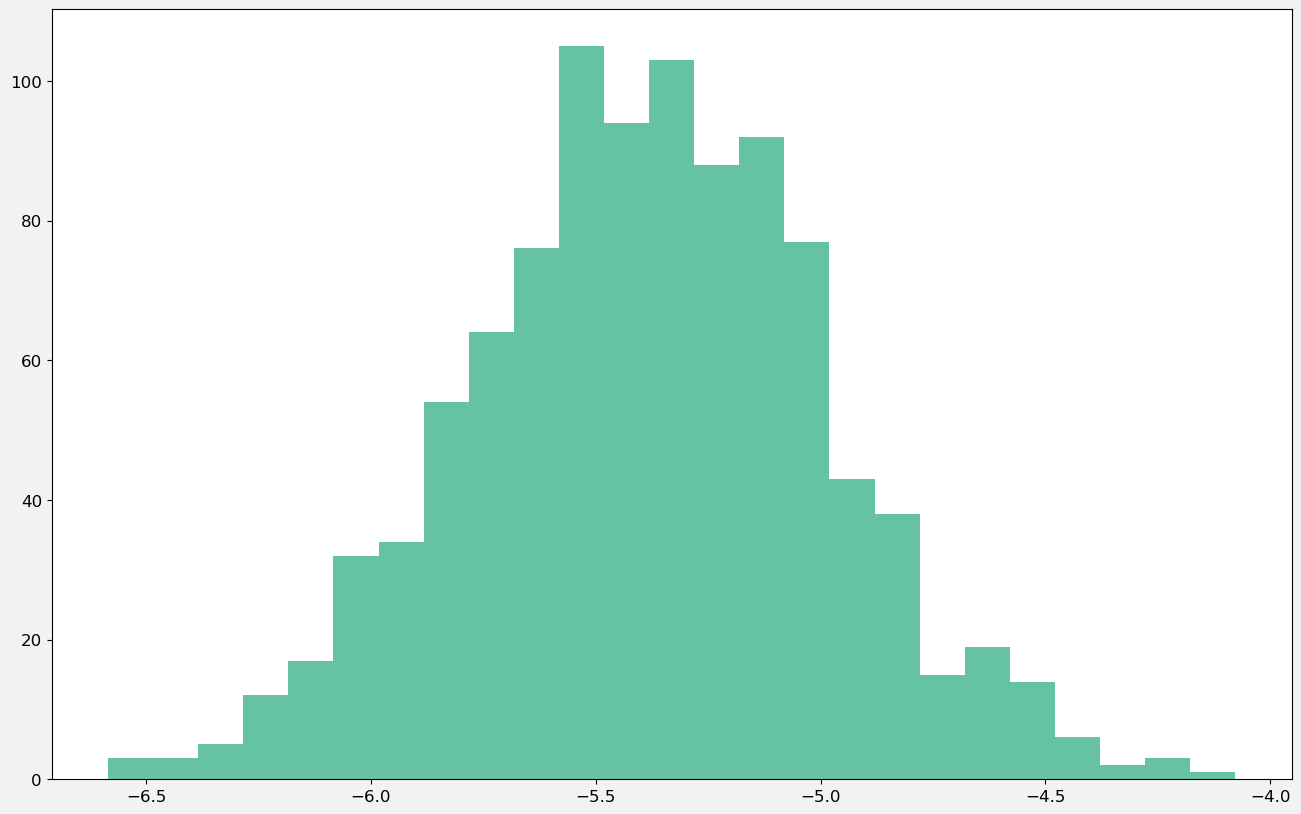

In [35]:
d_means = np.array(d_means)
plt.hist(d_means, bins=25)

In [9]:
print(d_means.mean(), d_means.std())


-5.3858204133188305 0.3975647371158678


If we compare these values with what is found with the exact formula, we get pretty close. 

## 2. Binomial distribution and normal distribution

* Generate a series from a binomial distribution, again with a p=.3, but now with n=1000. Generate 10,000 samples and store in an array.
* Generate a series from a normal distribution where the mean and std. deviation are calculated according to the formulas for the binomial distribution and numbers above (n=1000, p=.3)
* Plot both histograms on the same axis (perhaps with alpha=.5 to make transparent. When n is large, does it look like the normal distribution is a good proxy for the binomial distribution?

In [16]:
np.random.binomial(100,.4, 100)

array([41, 47, 32, 41, 38, 39, 36, 37, 28, 42, 38, 46, 40, 40, 43, 47, 35,
       41, 40, 44, 39, 45, 36, 35, 42, 48, 37, 36, 40, 41, 39, 42, 42, 38,
       37, 44, 49, 36, 39, 41, 37, 35, 35, 33, 41, 37, 47, 38, 37, 42, 45,
       34, 37, 52, 49, 48, 35, 41, 41, 34, 43, 39, 34, 44, 39, 43, 42, 37,
       32, 36, 29, 35, 27, 39, 44, 37, 43, 44, 39, 36, 40, 35, 40, 44, 33,
       35, 37, 32, 38, 41, 46, 45, 42, 32, 37, 27, 31, 40, 47, 32])

In [36]:
n=1000
p=.3
size=10000

binMean = n*p
binStd = np.sqrt(n*p*(1-p))


binSim = pd.Series(np.random.binomial(n,p, size))
normSim = pd.Series(np.random.normal(binMean, binStd,size))
    

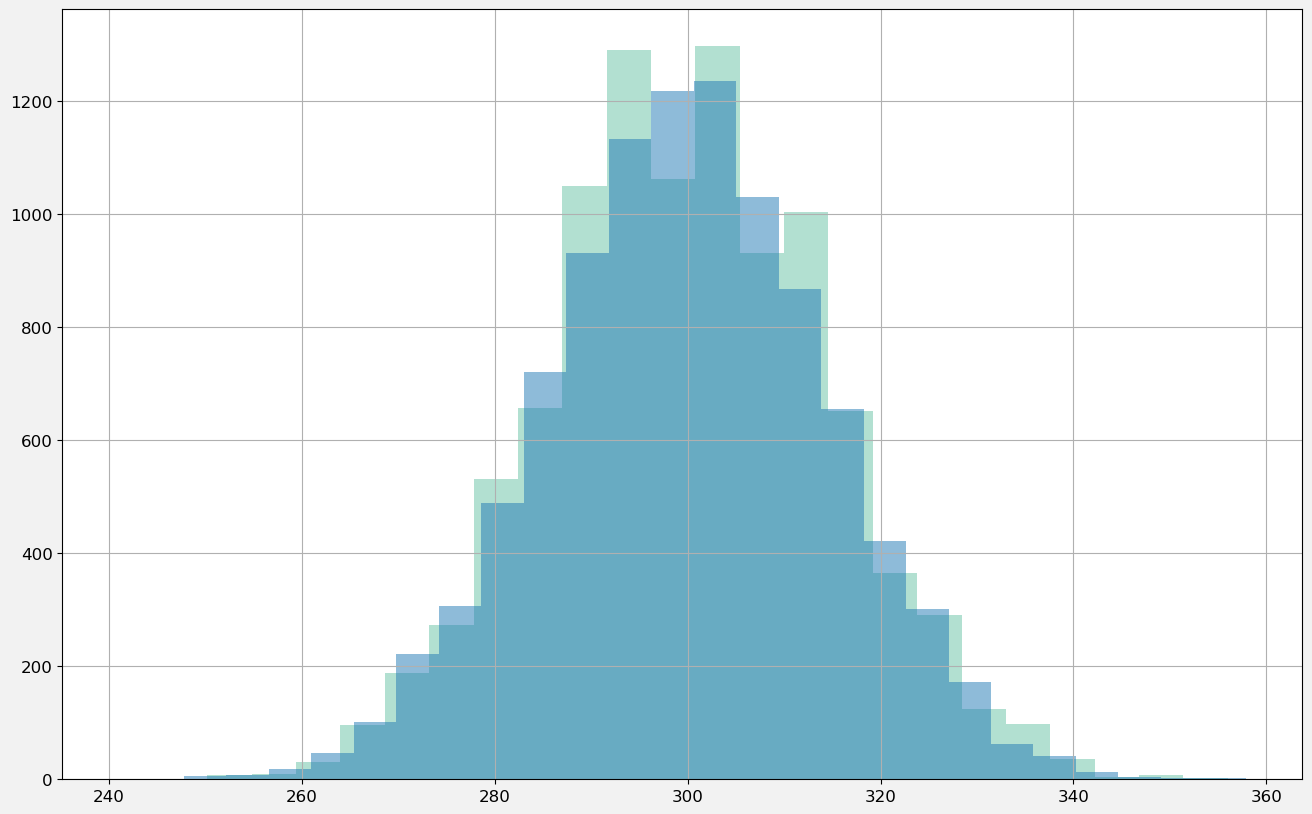

In [37]:
fig, ax = plt.subplots()
binSim.hist(bins=25, alpha=.5, ax=ax)
normSim.hist(bins=25, alpha=.5, ax=ax)
plt.show()

## 3. Distributions and real data

Load in the data from Penn World tables introduced in lab x. 

* Create a variable for real GDP (expenditure) per capital. Take a histogram of the data for a certain year.

* Does it look roughly normal?

* Take a log-transformation of the rgdp series. Plot a histogram of the transformed series. Does this appear (more) normal? (Log transformations are often done on all-positive series to make geometric relationships linear. So let's say that the relationship between GDP and the human capital index can be written: $GDP = a*e^{bHC}$. Taking the log of both sides, we get $log(GDP) = log(a) + b*HC$)

* Calculate the correlation coefficient between real GDP per capital (expenditure) and the Human capital index for the year 2019

* Calculate the correlation coefficient between real GDP for every year there is available data (use groupby to do this quickly). Does the correlation coefficient seem to change much over the years?

In [18]:
pwt = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/pwt100.csv", sep=";", decimal=",")

In [19]:
pwt["rgdpe_per_pers"] = pwt["rgdpe"]/pwt["pop"]
pwt2019 = pwt.loc[pwt.year==2019,:].copy()


<AxesSubplot:>

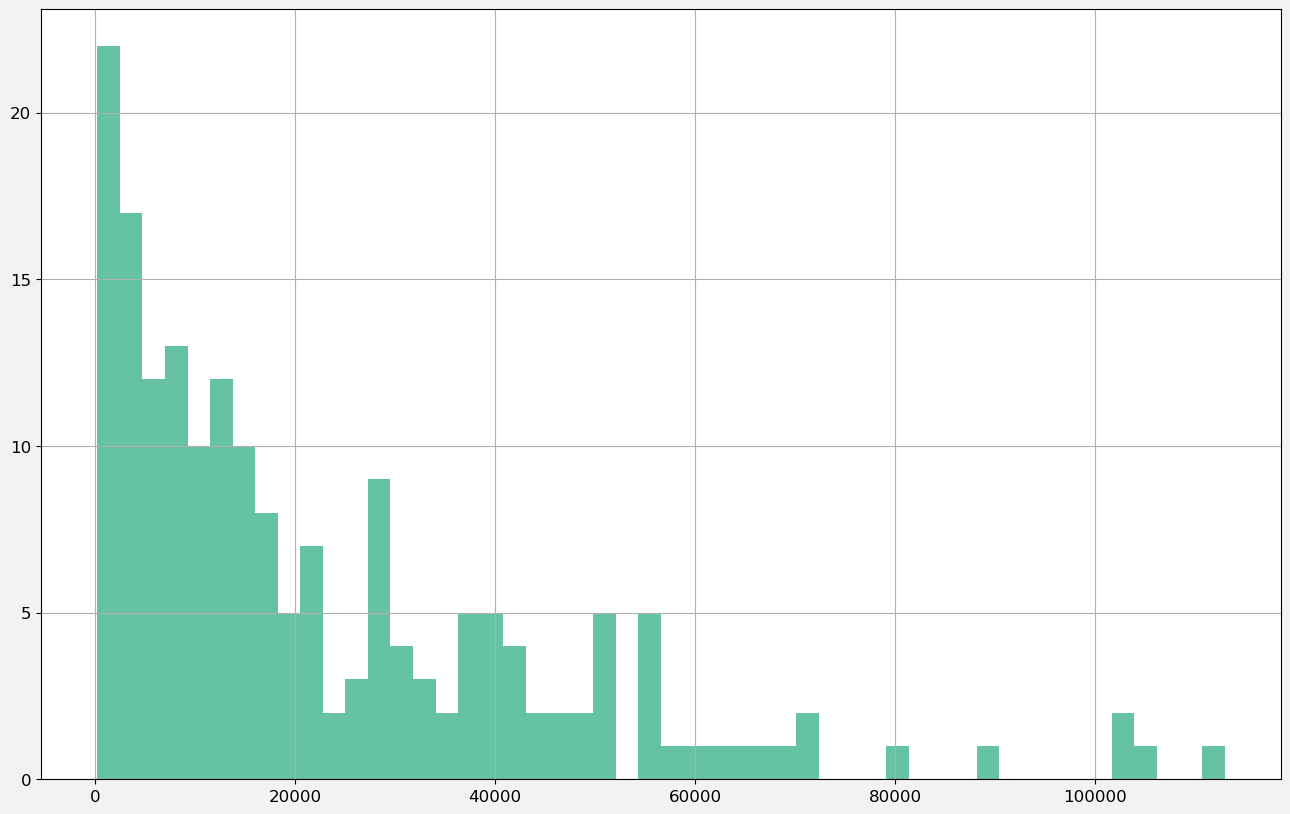

In [20]:
pwt2019.rgdpe_per_pers.hist(bins=50)

Does not look particularly normal, but we can log-transform:

(array([ 1.,  1.,  8., 15., 21., 18., 40., 33., 34., 12.]),
 array([ 5.52672335,  6.1375135 ,  6.74830365,  7.3590938 ,  7.96988395,
         8.5806741 ,  9.19146425,  9.8022544 , 10.41304455, 11.0238347 ,
        11.63462485]),
 <BarContainer object of 10 artists>)

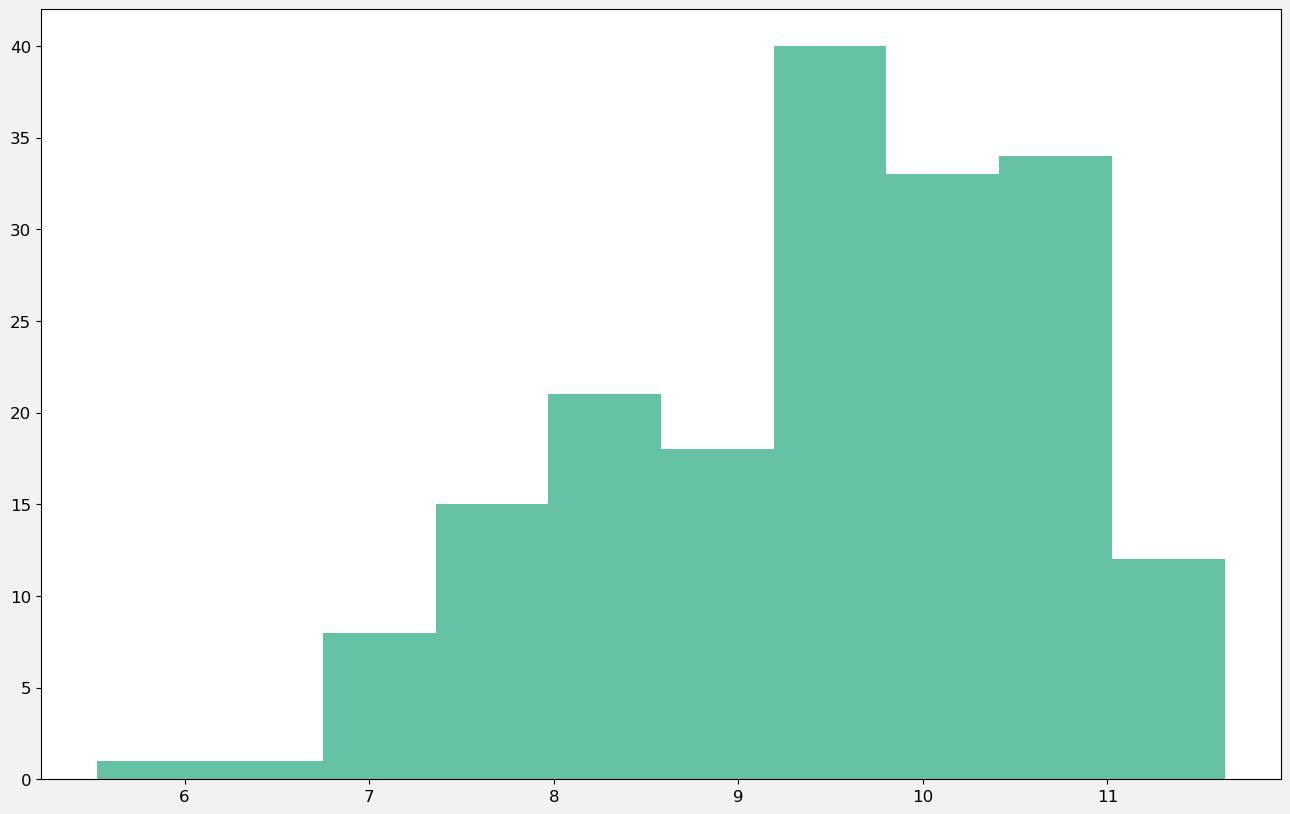

In [21]:
plt.hist(np.log(pwt2019.rgdpe_per_pers))

The log-transformed data looks more normal-ish...

Before calculating the correlation coefficient, we need to remove missing data:

In [22]:
pwt2019 = pwt2019.loc[(pwt2019.rgdpe_per_pers.notna()) & (pwt2019.hc.notna()) ,:]

In [23]:
cc = np.corrcoef([pwt2019.rgdpe_per_pers, pwt2019.hc])
cc

array([[1.       , 0.6496474],
       [0.6496474, 1.       ]])

In [96]:
cc[0,1]

0.649647399676185

Now we do the same for each year

In [24]:
pwt = pwt.loc[(pwt.rgdpe_per_pers.notna()) & (pwt.hc.notna()) ,:]

In [25]:
def calcCC(x):
    cc = np.corrcoef([x.rgdpe_per_pers, x.hc])
    return(cc[0,1])
  
pwtGrouped = pwt.groupby("year")

CCbyYear = []

for name, group in pwtGrouped["hc", "rgdpe_per_pers"]:
    CCbyYear.append({"year":name, "cc":calcCC(group)})
    
CCbyYear_df = pd.DataFrame(CCbyYear)

/var/folders/fs/kr83xdyx2jq_8gww_xfmtxfr0000gn/T/ipykernel_6386/3186306781.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for name, group in pwtGrouped["hc", "rgdpe_per_pers"]:


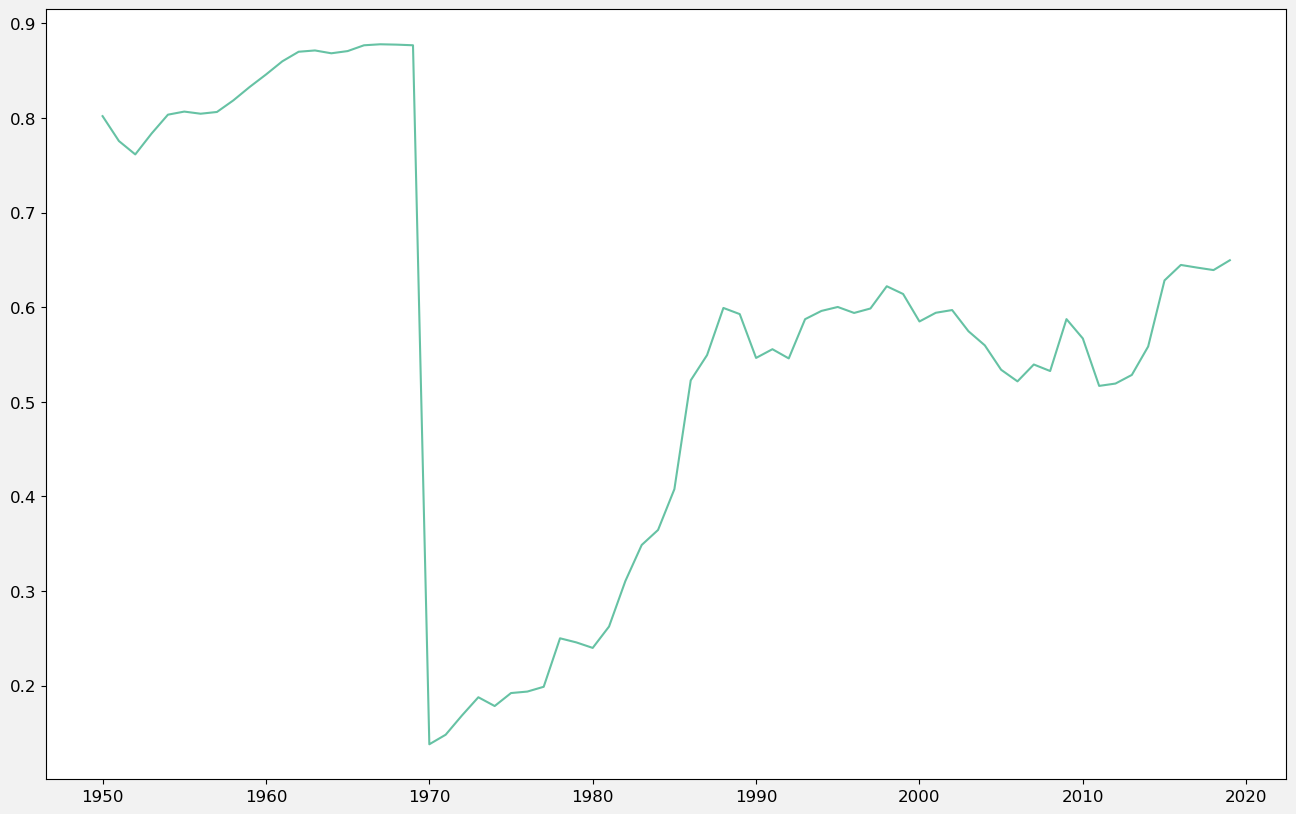

In [26]:
plt.plot(CCbyYear_df.year, CCbyYear_df.cc)

There seems to be something strange happening around 1970, where the correlation between real rgp and the HC index sees a large drop. Looking at the dataset, you can notice that many new countries entered the database in 1970, and these tend to be non-western, developing countries. Here, it seems the relationship between real GDP and the HC index is much weaker and leads to the big drop in the correlation coefficient. 

## 4. Distribution of electricity prices

Load data for electricity prices (found in lab 3) in Norway (Oslo prices). 

* Plot a histogram of the data. Does it look normal? 

* Let's say you assume electricity prices are normal. Take the mean and standard deviation of the prices. Using the assumption of normality, calculate what percentage of the time you would expect prices to be above 100 EURO/MWH

* What does this exercise tell you about the danger of incorrectly assuming a normal distribution when calculating risks?

In [38]:
prices2018 = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/prices2018.csv", sep=";", decimal=",")
prices2019 = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/prices2019.csv", sep=";", decimal=",")
prices2020 = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/prices2020.csv", sep=";", decimal=",")
prices2019 = prices2019.rename(columns={"Time": "date"})
prices = pd.concat([prices2018,prices2019,prices2020], axis=0)

array([[<AxesSubplot:title={'center':'Oslo'}>]], dtype=object)

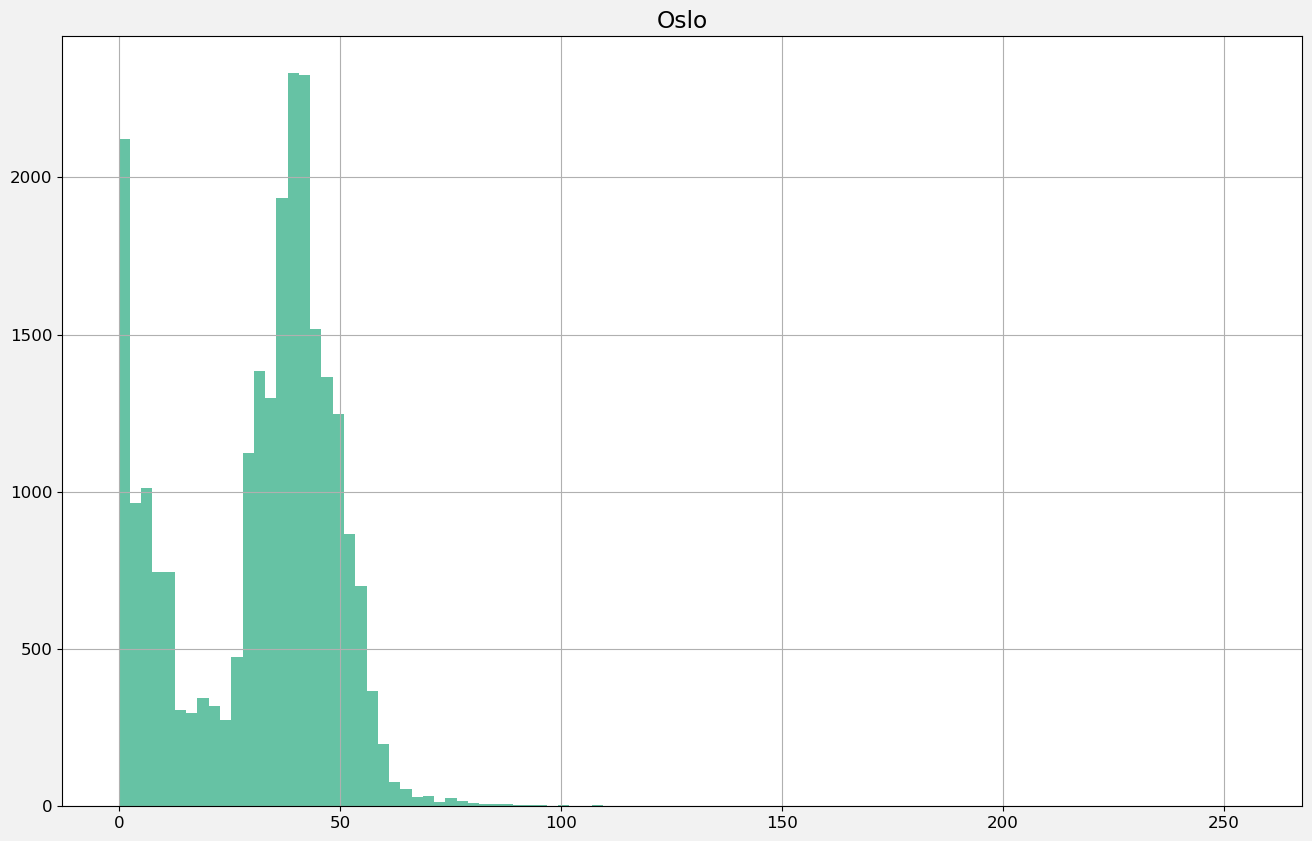

In [39]:
prices.hist("Oslo", bins=100)

Clearly, we do not have normal model
    - we have two peaks (called a bimodal model)
      - this is often an indication that we have a *mixture* model - something we model as two distributions combined into one. 
      - We also have a long right-tail, we say that the distribution is skewed
      
But now let's ignore this, and say we naively assume we have a normal distribution which we can describe by the mean and standard deviation. 

In [29]:
el_mean = prices.Oslo.mean()
el_std = prices.Oslo.std()

print(el_mean, el_std)

31.997012410986617 17.517401209400038


Now assuming that we have a normal distribution we can simulate our solution to the question of how many time we expect that prices will be above 100

In [32]:
#simulate 100,000 draws from a normal distribution with the mean and st.dev found above:
n=100000
elsim = np.random.normal(el_mean, el_std, n)

### calculate the proportion of prices above 100 according to the normal estimate
normEst = np.sum(elsim>100)/n

### the actual number
realProp = np.sum(prices.Oslo>100)/prices.Oslo.count()

In [34]:
normEst

5e-05

In [33]:
realProp/normEst

11.393692777212614

So in reality, the number of observations with prices above 100 Eur/MWH was 9.5 times what we would guess assuming a normal distribution. This shows the danger of assuming normality when it does not actually exist!